<b>Autor:</b> Joaquín Vázquez Palacios<br>
<b>Curso:</b> 4º INSO<br>
<b>Grupo:</b> B<br>
<b>Asignatura:</b> Aprendizaje Automático 2

# PRÁCTICA 2

In [166]:
library(caret)
library(lme4)
library(merTools)
library(gmodels)
library(nlme)
library(ggplot2)
library(ggfortify)
library(sjPlot)
library(mgcv)

### Preparación de los datos

In [2]:
load("datos_2500_vehiculos.rda")

In [3]:
summary(datos_def2)

        Manufacturer_commercial Commercial_name         Mass     
 BMW AG             : 360       Length:2586        Min.   : 885  
 DAIMLER AG         : 188       Class :character   1st Qu.:1375  
 FORD WERKE GMBH    : 177       Mode  :character   Median :1565  
 RENAULT            : 144                          Mean   :1611  
 AUTOMOBILES PEUGEOT: 129                          3rd Qu.:1820  
 VOLKSWAGEN         : 116                          Max.   :2780  
 (Other)            :1472                                        
 WLTP_test_mass CO2_Emissions_NEDC CO2_Emissions_WLTP   Wheel_base  
 Min.   : 997   Min.   : 13.0      Min.   :  4.0      Min.   :1589  
 1st Qu.:1514   1st Qu.:114.0      1st Qu.:140.5      1st Qu.:2626  
 Median :1720   Median :131.0      Median :160.0      Median :2700  
 Mean   :1759   Mean   :139.4      Mean   :167.0      Mean   :2758  
 3rd Qu.:1978   3rd Qu.:157.0      3rd Qu.:189.0      3rd Qu.:2864  
 Max.   :2817   Max.   :448.0      Max.   :395.0      Max.

In [3]:
datos_def2 <- datos_def2[!is.na(datos_def2$Engine_capacity) &
                           !is.na(datos_def2$Engine_power) ,]

datos_def2$Fueltype_emission <- as.factor(paste(datos_def2$Fuel_type,
                                                datos_def2$Emissions_reduction_equipe, 
                                                sep = "_"))

save(datos_def2, file = "datos_2500_vehiculos.rda")

In [4]:
summary(datos_def2)

        Manufacturer_commercial Commercial_name         Mass     
 BMW AG             : 360       Length:2586        Min.   : 885  
 DAIMLER AG         : 188       Class :character   1st Qu.:1375  
 FORD WERKE GMBH    : 177       Mode  :character   Median :1565  
 RENAULT            : 144                          Mean   :1611  
 AUTOMOBILES PEUGEOT: 129                          3rd Qu.:1820  
 VOLKSWAGEN         : 116                          Max.   :2780  
 (Other)            :1472                                        
 WLTP_test_mass CO2_Emissions_NEDC CO2_Emissions_WLTP   Wheel_base  
 Min.   : 997   Min.   : 13.0      Min.   :  4.0      Min.   :1589  
 1st Qu.:1514   1st Qu.:114.0      1st Qu.:140.5      1st Qu.:2626  
 Median :1720   Median :131.0      Median :160.0      Median :2700  
 Mean   :1759   Mean   :139.4      Mean   :167.0      Mean   :2758  
 3rd Qu.:1978   3rd Qu.:157.0      3rd Qu.:189.0      3rd Qu.:2864  
 Max.   :2817   Max.   :448.0      Max.   :395.0      Max.

## Formulación de la tarea

La Dirección General de Tráfico se ha planteado (¡por fin!) tener una metodología para clasificar los vehículos en función de sus emisiones, y no (como ahora) simplemente por el año de fabricación y el tipo de combustible. Pero para poder clasificar a un vehículo según aparece en el mercado será necesario disponer de un modelo (de cualquier tipo) que a partir de datos físicos permita establecer cuál es el nivel de emisiones lo más aproximado posible, y clasificar a los vehículos por un valor cuantitativo. Por ejemplo, el percentil de emisiones.

Uno de los gases que emiten los vehículos es el CO2, que es el responsable, en gran medida, de lo que se conoce como "efecto invernadero", que produce el calentamieno del planeta Tierra y que es uno de los causantes principales del cambio climático que se empieza a manifestar de forma preocupante.

Como parte de la homologación de un vehículo se miden estas emisiones, y la Comisión Europea publica un dataset específico para este fenómeno:

https://www.eea.europa.eu/data-and-maps/data/co2-cars-emission-18

Los datos que incluye este dataset son por país. Utilizando los filtros proporcionados se ha seleccionado España. Y además ha sido necesaria una simplificación y alguna manipulación, recogida en este .Rmd

ENTREGA: Por favor, entrega un .Rmd para toda la tarea. Los puntos siguientes son únicamente para presentar (y calificar) por partes esta tarea.

## 1. Modelos de efectos fijos

<b>
Resultado AIC fijos_1: 20872.65<br>
Resultado AIC fijos_2: 20945.78<br>
</b>

1. Calcula el mejor modelo de efectos fijos que tenga en cuenta la marca ("Manufacturer_commercial") como factor fijo.

In [142]:
fijos_1 <- lm(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_2 +
                Engine_capacity + Engine_power +
                Manufacturer_commercial+ 
                Fuel_type+
                Innovative_technology+
                Fuel_mode,
              data = datos_def2)

summary(fijos_1)


Call:
lm(formula = CO2_Emissions_NEDC ~ Mass + Wheel_base + Axle_width_2 + 
    Engine_capacity + Engine_power + Manufacturer_commercial + 
    Fuel_type + Innovative_technology + Fuel_mode, data = datos_def2)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.879  -6.995  -0.532   5.968  87.207 

Coefficients: (1 not defined because of singularities)
                                                       Estimate Std. Error
(Intercept)                                           9.295e+01  1.583e+01
Mass                                                  7.066e-02  2.419e-03
Wheel_base                                           -5.901e-03  2.426e-03
Axle_width_2                                         -6.464e-02  9.349e-03
Engine_capacity                                       1.778e-02  1.011e-03
Engine_power                                          7.023e-02  1.070e-02
Manufacturer_commercialADIDOR                         2.177e+01  1.343e+01
Manufacturer_commercialALPINE          

Warning message:
"Removed 7 rows containing missing values (geom_point)."
Warning message:
"Removed 9 row(s) containing missing values (geom_path)."


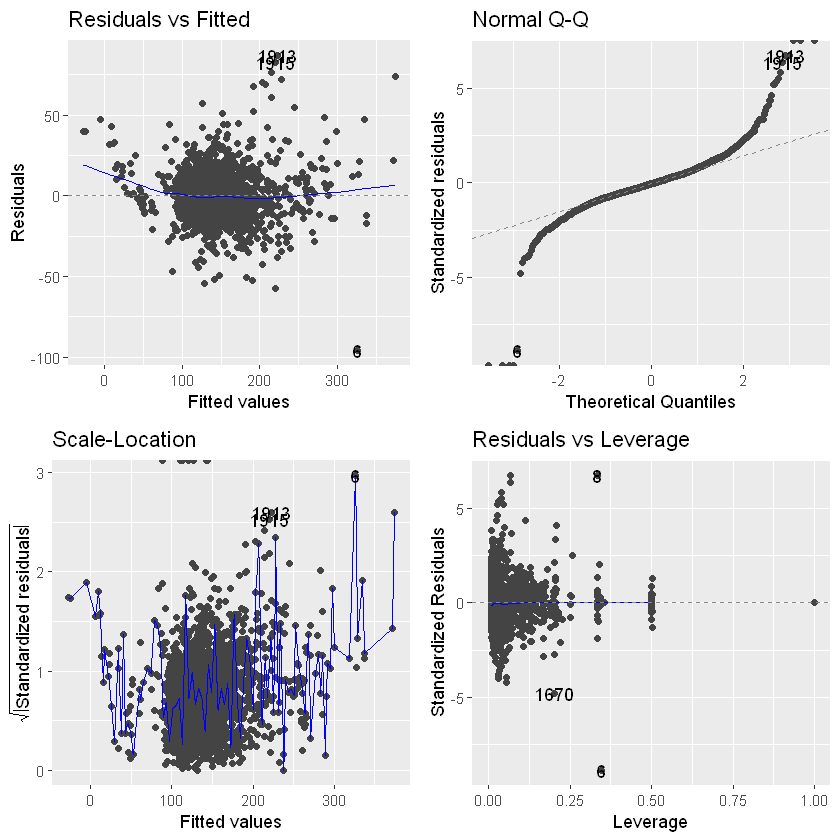

In [124]:
autoplot(fijos_1)

2. Calcula el mejor modelo de efectos fijos que tenga en cuenta la combinación tipo de combustible y equipo de reducción de emisiones ("Fueltype_emission") 

In [157]:
fijos_2  <- lm(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_2 +
                Engine_capacity + Engine_power +
                Manufacturer_commercial+ 
                Fuel_type:Fueltype_emission+
                Innovative_technology+
                Fuel_mode,
              data = datos_def2)

summary(fijos_2)


Call:
lm(formula = CO2_Emissions_NEDC ~ Mass + Wheel_base + Axle_width_2 + 
    Engine_capacity + Engine_power + Manufacturer_commercial + 
    Fuel_type:Fueltype_emission + Innovative_technology + Fuel_mode, 
    data = datos_def2)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.768  -6.768  -0.513   5.804  78.814 

Coefficients: (473 not defined because of singularities)
                                                               Estimate
(Intercept)                                                   1.190e+02
Mass                                                          7.125e-02
Wheel_base                                                   -5.166e-03
Axle_width_2                                                 -6.765e-02
Engine_capacity                                               1.776e-02
Engine_power                                                  7.128e-02
Manufacturer_commercialADIDOR                                 2.250e+01
Manufacturer_commercialALPINE         

Warning message:
"Removed 24 rows containing missing values (geom_point)."
Warning message:
"Removed 38 row(s) containing missing values (geom_path)."


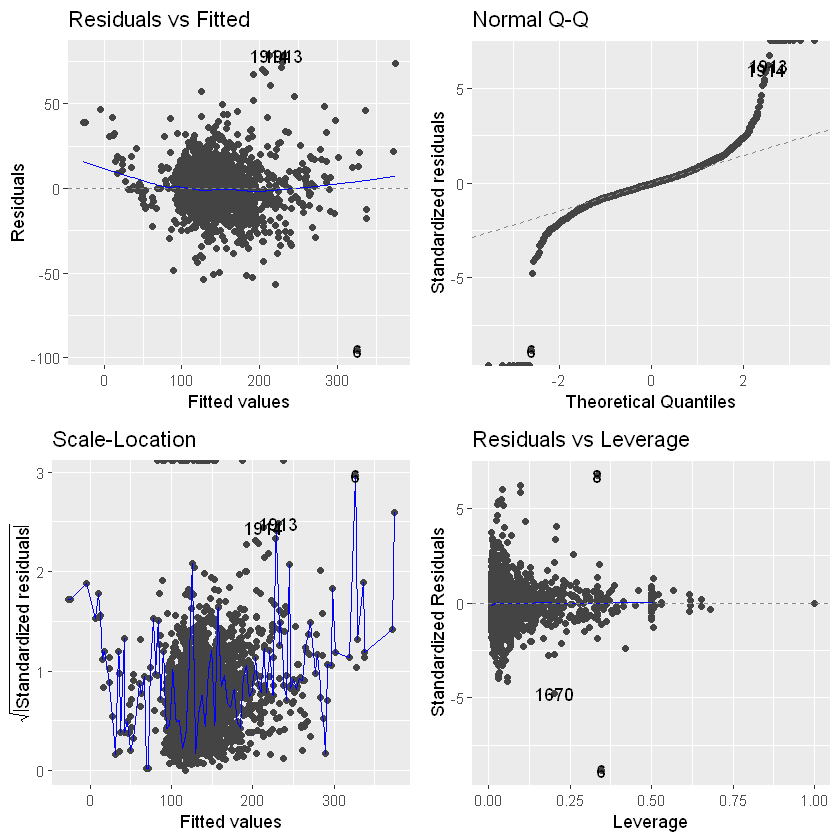

In [158]:
autoplot(fijos_2)

In [160]:
AIC(fijos_1, fijos_2)

,df,AIC
,<dbl>,<dbl>
fijos_1,121,20872.65
fijos_2,189,20945.78


3. Decide cuál de los dos modelos es el mejor y justifica por qué.

<b>El modelo fijos_1 es superior, mejor R^2 ajustada y menor AIC, además fijos_1 tiene la ventaja de tener menor número de parámetros.</b>

## 2. Modelos de efectos aleatorios

Un modelo de efectos fijos que tenga en cuenta conjuntamente la combinación tipo de combustible y equipo de reducción de emisiones ("Fueltype_emission") es inabordable, por la enorme cantidad de parámetros a estimar -si es que finalmente se puede estimar. 

Sin embargo un modelo con efectos aleatorios en la combinación de ambos es abordable. Se trata por tanto de hacer los siguientes modelos de efectos mixtos:

1. Modelo de efectos mixtos con efecto aleatorio de "Fueltype_emission".
2. Modelo de efectos mixtos con efecto aleatorio de "Fueltype_emission" anidado en Manufacturer_commercial
3. Comparar ambos modelos y decidir si el segundo (más complejo) es significativamente mejor que el primero

<b>
Resultado AIC aleatorios_1: 22266.15<br>
Resultado AIC aleatorios_2: 21798.96<br>
<br>
El modelo aleatorios_2 supera a aleatorios_1 pero no a fijos_1.
</b>

In [200]:
aleatorios_1  <- lmer(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_1 + Axle_width_2 +
                Engine_capacity + Engine_power +
                (1 | Fueltype_emission),
              data = datos_def2,REML = FALSE)

summary(aleatorios_1)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: 
CO2_Emissions_NEDC ~ Mass + Wheel_base + Axle_width_1 + Axle_width_2 +  
    Engine_capacity + Engine_power + (1 | Fueltype_emission)
   Data: datos_def2

     AIC      BIC   logLik deviance df.resid 
 22266.2  22318.9 -11124.1  22248.2     2577 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1161 -0.4887 -0.0509  0.4302  9.8758 

Random effects:
 Groups            Name        Variance Std.Dev.
 Fueltype_emission (Intercept) 680.8    26.09   
 Residual                      293.9    17.14   
Number of obs: 2586, groups:  Fueltype_emission, 78

Fixed effects:
                 Estimate Std. Error t value
(Intercept)     96.382324  15.142375   6.365
Mass             0.059795   0.002523  23.702
Wheel_base      -0.004487   0.002719  -1.650
Axle_width_1     0.019898   0.019512   1.020
Axle_width_2    -0.085146   0.017756  -4.795
Engine_capacity  0.016464   0.001166  14.117
Engine_power     0.139346   0.011705

In [250]:
aleatorios_2  <- lmer(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_1 + Axle_width_2 +
                Engine_capacity + Engine_power +
                (1 | Fueltype_emission:Manufacturer_commercial),
              data = datos_def2,REML = FALSE)

summary(aleatorios_2)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: 
CO2_Emissions_NEDC ~ Mass + Wheel_base + Axle_width_1 + Axle_width_2 +  
    Engine_capacity + Engine_power + (1 | Fueltype_emission:Manufacturer_commercial)
   Data: datos_def2

     AIC      BIC   logLik deviance df.resid 
 21799.0  21851.7 -10890.5  21781.0     2577 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.7968 -0.4841 -0.0380  0.4213  5.9969 

Random effects:
 Groups                                    Name        Variance Std.Dev.
 Fueltype_emission:Manufacturer_commercial (Intercept) 1157.6   34.02   
 Residual                                               176.4   13.28   
Number of obs: 2586, groups:  Fueltype_emission:Manufacturer_commercial, 327

Fixed effects:
                  Estimate Std. Error t value
(Intercept)     123.392270  13.458418   9.168
Mass              0.068480   0.002572  26.624
Wheel_base       -0.005279   0.002534  -2.083
Axle_width_1     -0.006718   0.017860  -0.376


In [201]:
anova(aleatorios_1, aleatorios_2)
AIC(aleatorios_1, aleatorios_2)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
aleatorios_1,9,22266.15,22318.87,-11124.08,22248.15,NA,NA,NA
aleatorios_2,9,21798.96,21851.68,-10890.48,21780.96,467.1927,0,NA


,df,AIC
,<dbl>,<dbl>
aleatorios_1,9,22266.15
aleatorios_2,9,21798.96


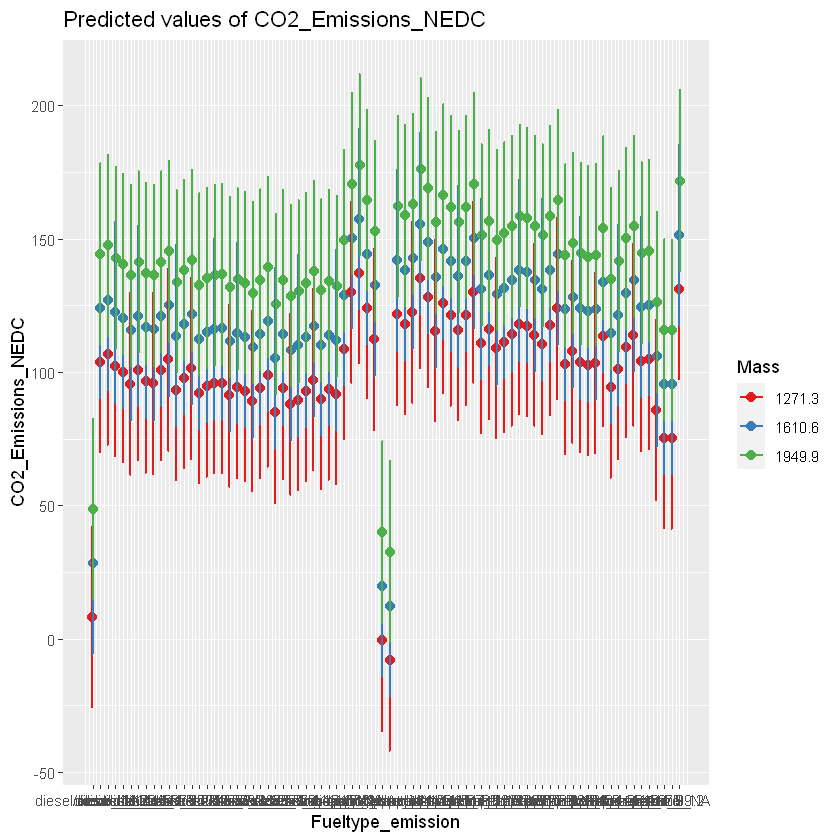

In [248]:
plot_model(aleatorios_1,type="pred",
       terms=c("Fueltype_emission", "Mass"),pred.type="re")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



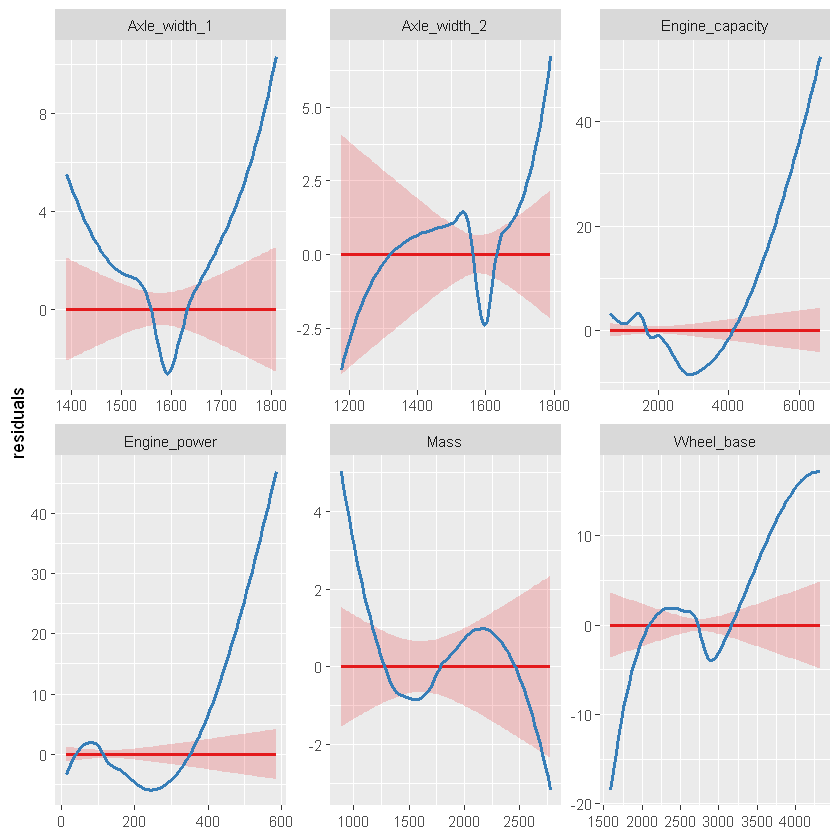

In [235]:
plot_model(aleatorios_1, type = "resid")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



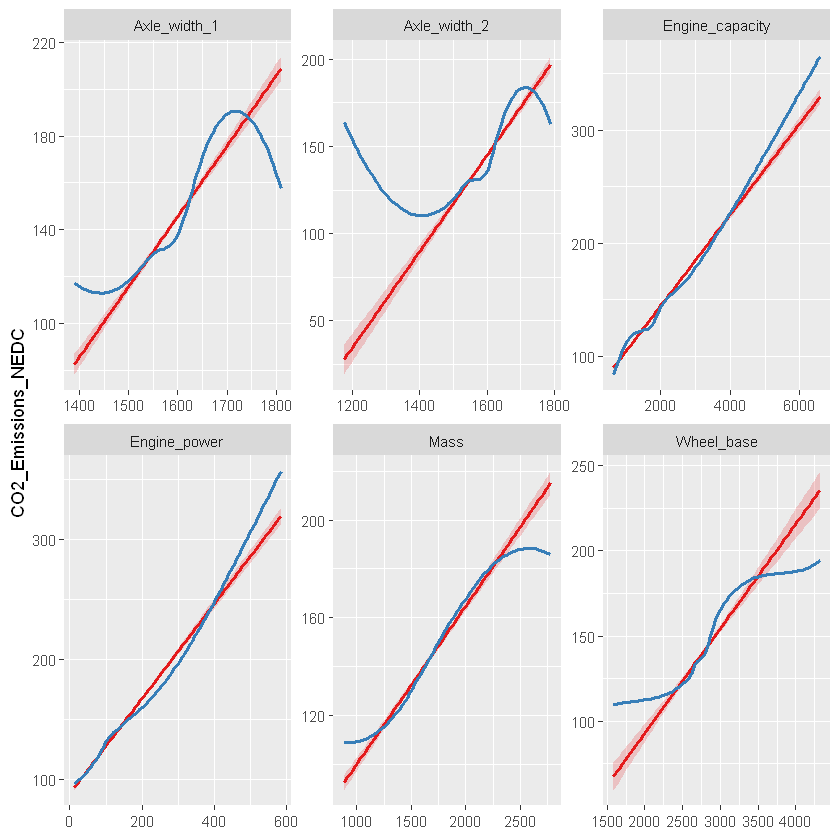

In [276]:
plot_model(aleatorios_1, type = "slope")

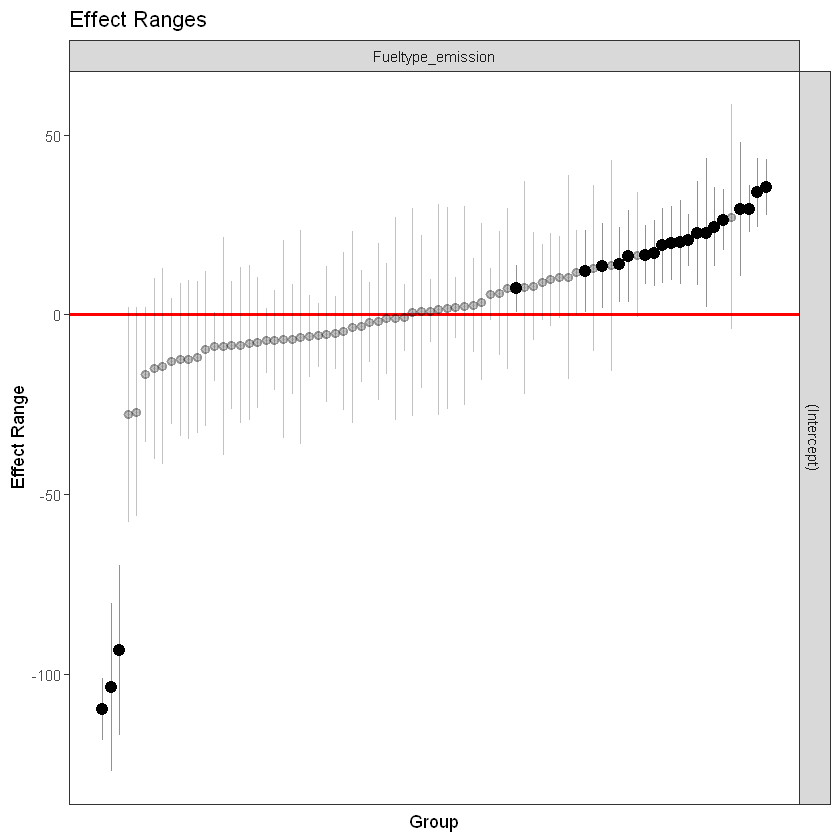

In [32]:
plotREsim(REsim(aleatorios_1))

Warning message:
"Interaction terms are not supported by this plot type. Output for interaction terms may be inappropriate."
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



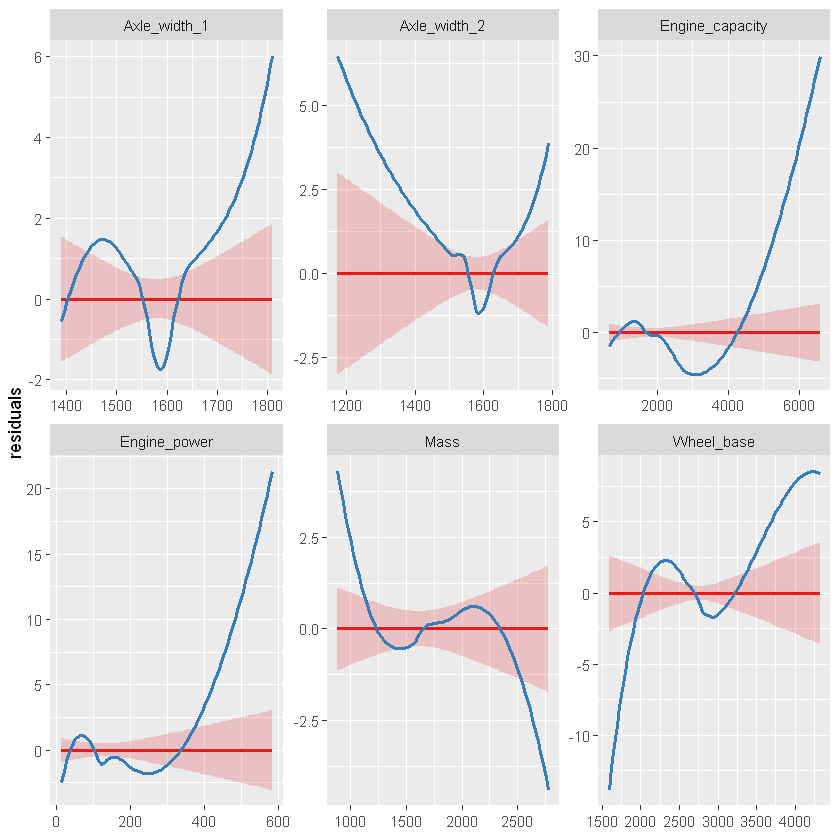

In [294]:
plot_model(aleatorios_2, type = "resid")

Warning message:
"Interaction terms are not supported by this plot type. Output for interaction terms may be inappropriate."
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



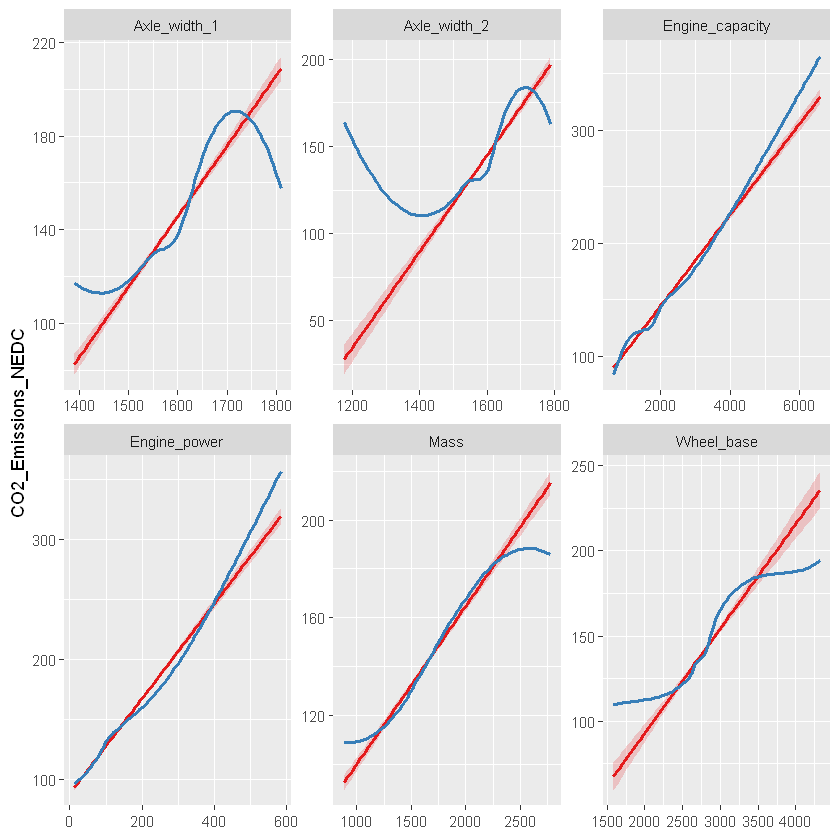

In [295]:
plot_model(aleatorios_2, type = "slope")

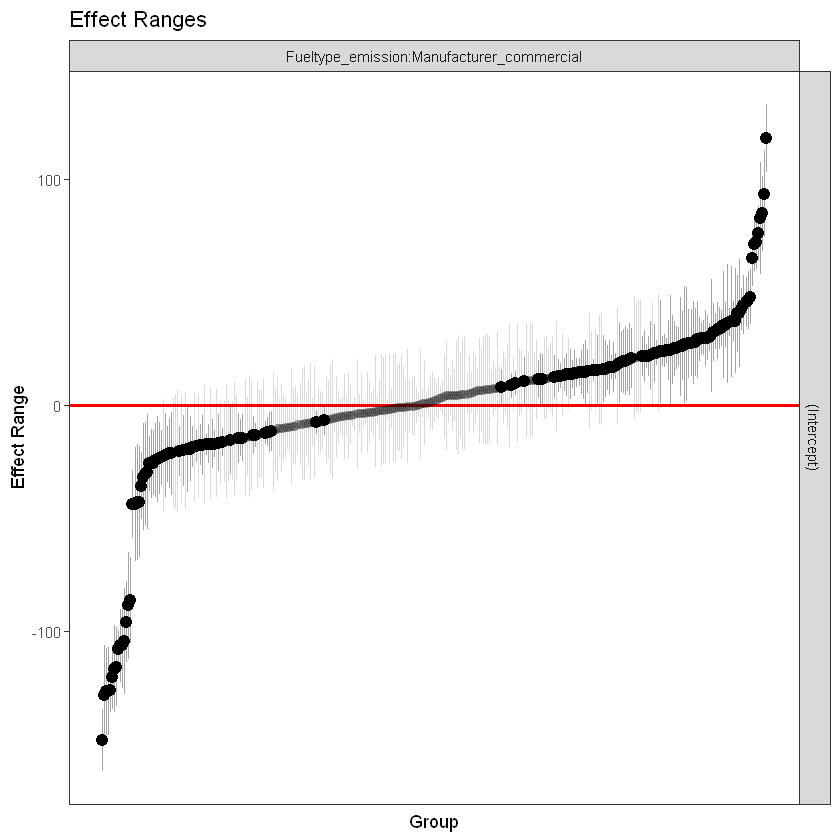

In [33]:
plotREsim(REsim(aleatorios_2))

## 3. Modelo Random Forest

Utilizamos las mismas variables predictoras con las que se ha realizado el modelo fijos_1 en el algoritmo Random Forest.

<b>
Resultado de R^2 ajustado:  0.8756835 con mtry = 42
<br><br>
No mejora a fijos_1.
</b>

In [270]:
set.seed(355)
trainIndex <- createDataPartition(datos_def2$CO2_Emissions_NEDC, p = 0.7, list = FALSE)
trainingSet <- datos_def2[trainIndex,]
testSet <- datos_def2[-trainIndex,]

In [271]:
rf <- train(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_1 + Axle_width_2 +
                Engine_capacity + Engine_power +
                Fueltype_emission, 
                data = trainingSet, method = "rf")
rf

Random Forest 

1813 samples
   7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1813, 1813, 1813, 1813, 1813, 1813, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE      
   2    32.66540  0.6539472  22.641368
  42    14.40494  0.8756835   8.734614
  83    14.89683  0.8646229   8.888566

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 42.

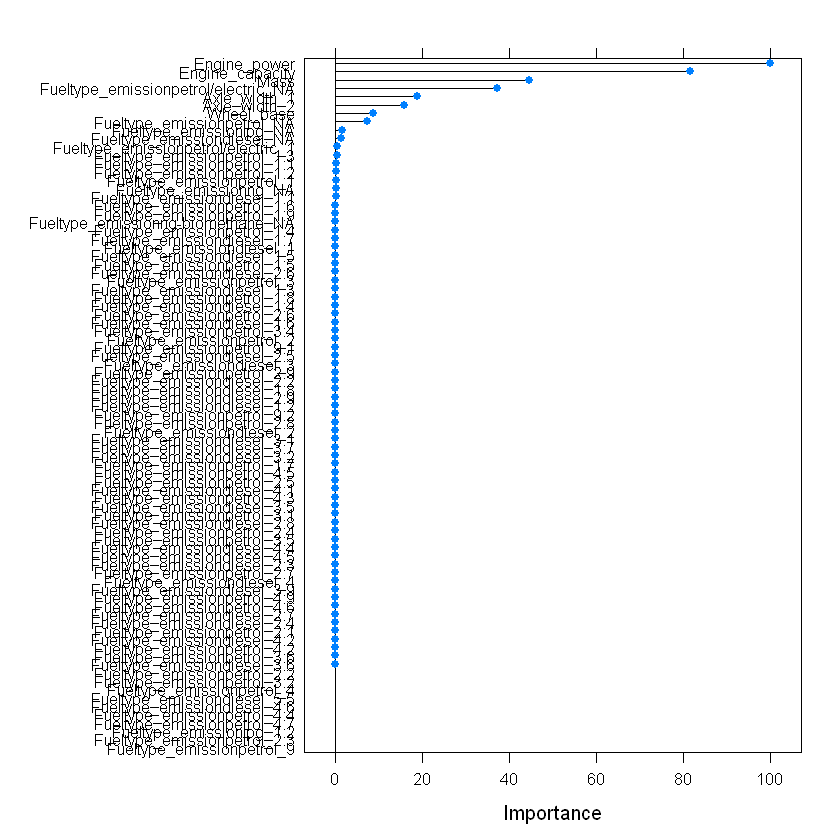

In [272]:
varimp_RF <- varImp(rf)
plot(varimp_RF)

In [289]:
names(testSet) <- names(trainingSet)
fitted <- predict(rf, testSet, na.action = na.pass)

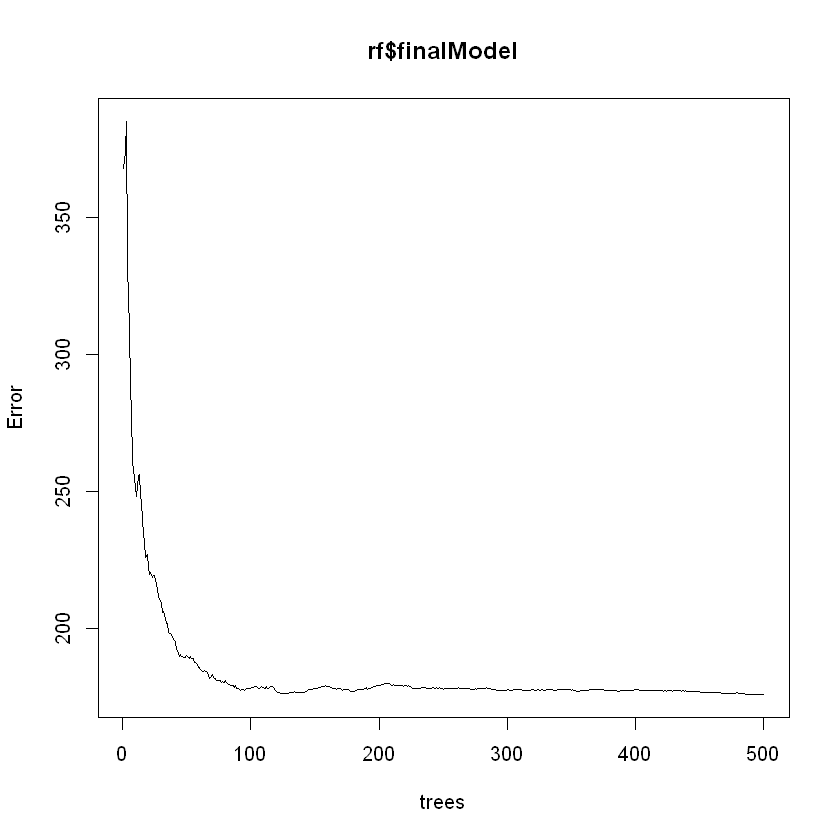

In [288]:
plot(rf$finalModel)

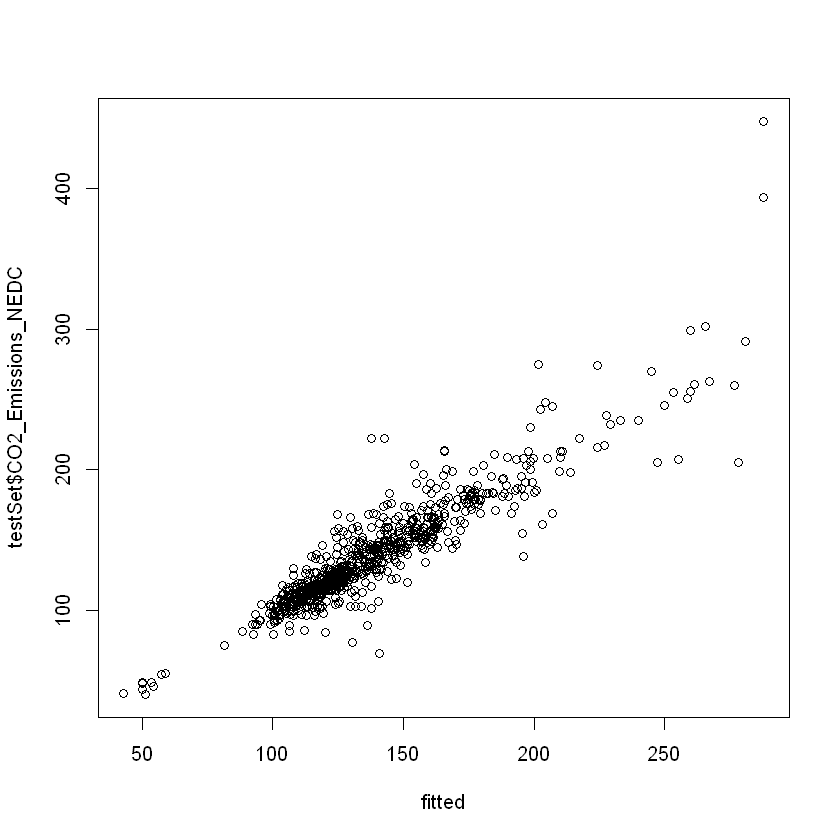

In [293]:
plot(fitted, testSet$CO2_Emissions_NEDC)

## 4. Modelo lm utilizando PCA

Pasamos las variables numéricas del dataset por la función prcomp() para extraer los componentes principales y, con estos, realizar un modelo lineal para ver si mejora al anterior (fijos_1).<br>

<b>
Resultado de R^2 ajustado:  0.5782<br>
Resultado AIC modelPCA: 24181.5
<br><br>
No mejora a fijos_1
</b>

In [93]:
pca <- prcomp(datos_def2[,c(3,7:9, 12, 13)],scale. = TRUE)
dataset_pca <- as.data.frame(cbind(pca$x, datos_def2$CO2_Emissions_NEDC))

In [95]:
modelPCA <- lm(V7 ~ .,
              data = dataset_pca)

summary(modelPCA)


Call:
lm(formula = V7 ~ ., data = dataset_pca)

Residuals:
     Min       1Q   Median       3Q      Max 
-174.186  -12.380   -0.157   12.688  177.043 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 139.4033     0.5096 273.557  < 2e-16 ***
PC1          12.1787     0.2468  49.342  < 2e-16 ***
PC2         -15.7761     0.4824 -32.705  < 2e-16 ***
PC3          -4.6642     0.9195  -5.072 4.21e-07 ***
PC4          -2.9186     1.2859  -2.270 0.023308 *  
PC5           2.1595     1.5548   1.389 0.164978    
PC6          -8.1927     2.3415  -3.499 0.000475 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.91 on 2579 degrees of freedom
Multiple R-squared:  0.5792,	Adjusted R-squared:  0.5782 
F-statistic: 591.6 on 6 and 2579 DF,  p-value: < 2.2e-16


In [144]:
AIC(modelPCA)

[1] 24181.54

## 5. Modelo GAM

Tras realizar varias pruebas el mejor resultado de R^2 ajustado lo he obtenido sin indicar ningún paramétro 'k' ni 'by' al suavizado de las variables. Al hacerlo, el resultado se reducía por milésimas.

<b>
Resultado de R^2 ajustado: 0.9<br>
Resultado AIC gam_1: 20585.07<br>
<br>
gam_1 supera a fijos_1.
</b>

In [138]:
gam_1 <- gam(CO2_Emissions_NEDC ~ s(Mass) + 
                s(Wheel_base) + 
                s(Axle_width_2) +
                s(Engine_capacity) + 
                s(Engine_power) +
                Manufacturer_commercial + 
                Fuel_type +
                Innovative_technology +
                Fuel_mode,
             data = datos_def2, method = "REML")

In [139]:
summary(gam_1)


Family: gaussian 
Link function: identity 

Formula:
CO2_Emissions_NEDC ~ s(Mass) + s(Wheel_base) + s(Axle_width_2) + 
    s(Engine_capacity) + s(Engine_power) + Manufacturer_commercial + 
    Fuel_type + Innovative_technology + Fuel_mode

Parametric coefficients:
                                                       Estimate Std. Error
(Intercept)                                           128.91869    9.51569
Manufacturer_commercialADIDOR                          29.07327   12.66287
Manufacturer_commercialALPINE                           9.81893   15.58751
Manufacturer_commercialASTON MARTIN                    72.35170   12.44899
Manufacturer_commercialAUDI AG                          1.57847    9.09325
Manufacturer_commercialAUDI HUNGARIA                    0.17061   11.64257
Manufacturer_commercialAUDI SPORT                      21.79416   10.30443
Manufacturer_commercialAUTOMOBILES CITROEN              0.89238    9.05457
Manufacturer_commercialAUTOMOBILES PEUGEOT             -0.9

In [143]:
AIC(fijos_1, gam_1)

,df,AIC
,<dbl>,<dbl>
fijos_1,121.0000,20872.65
gam_1,145.2269,20585.07


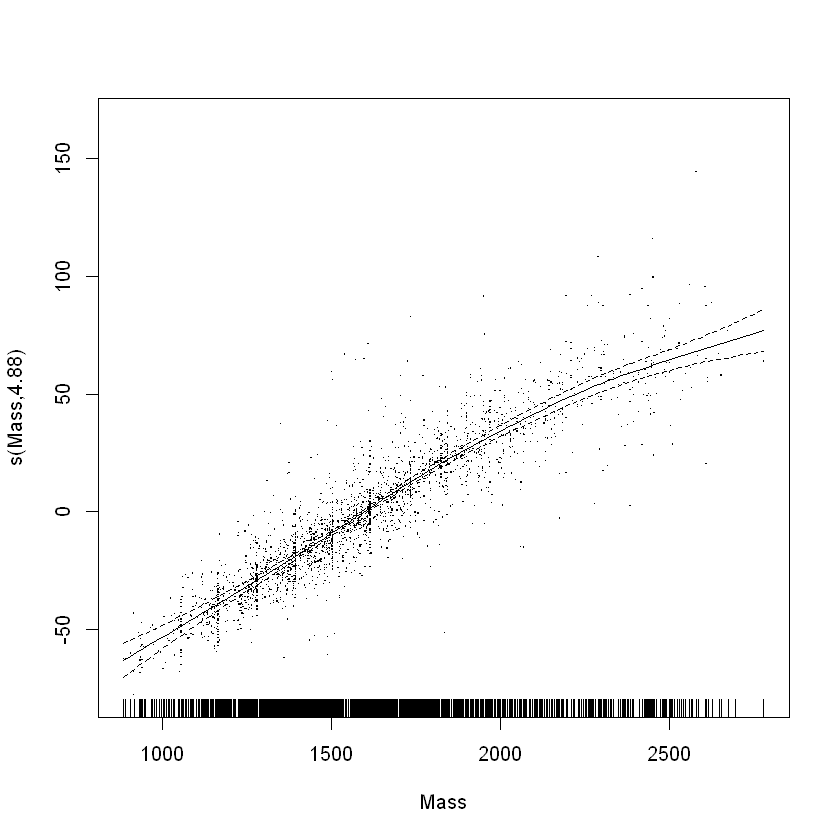

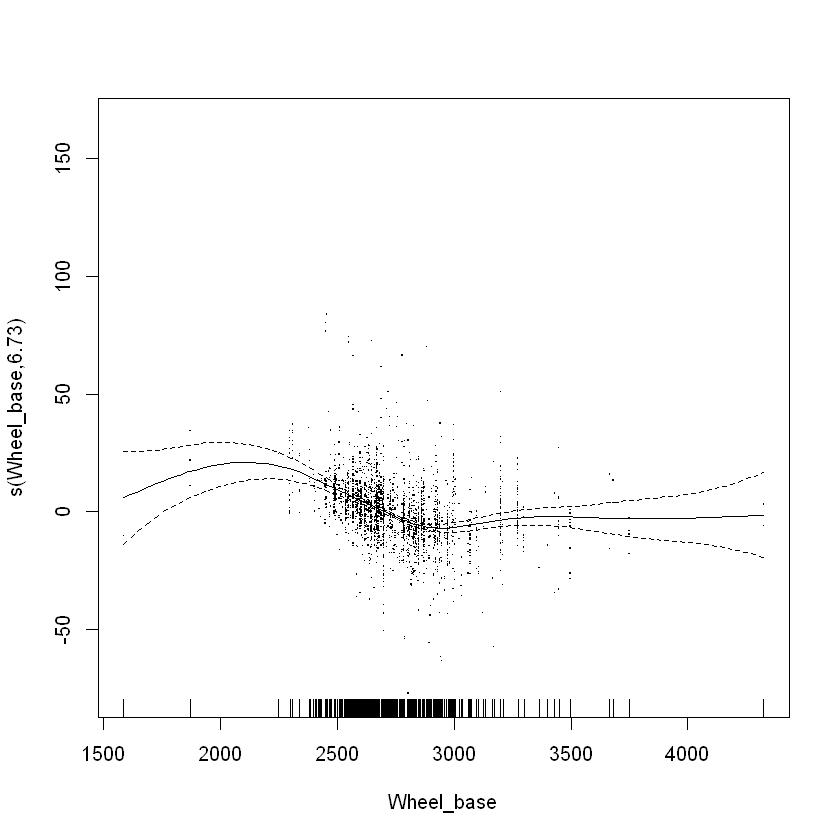

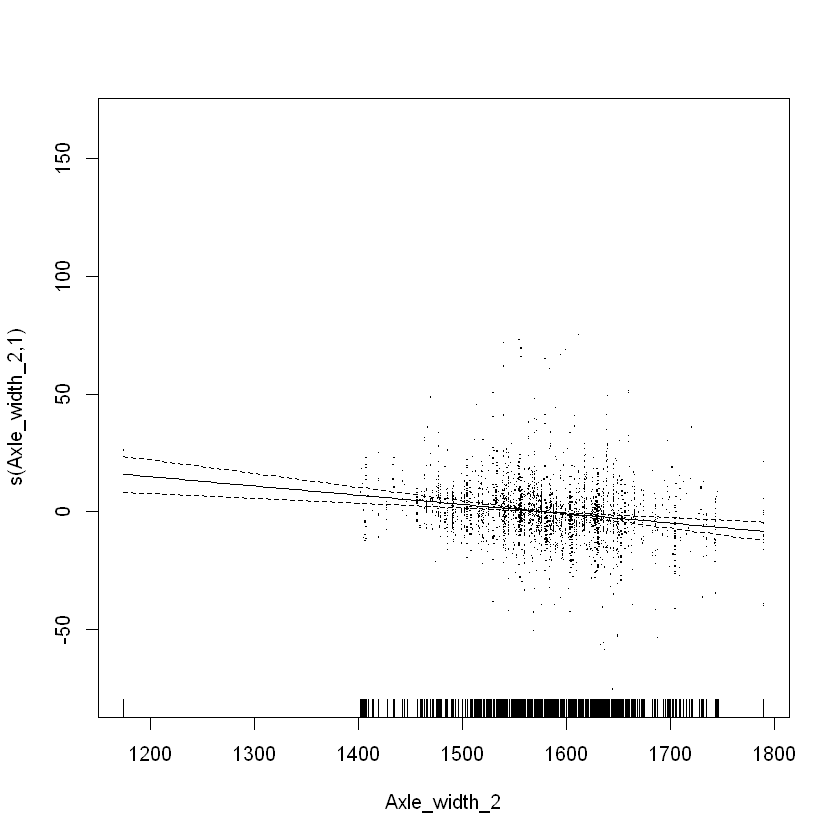

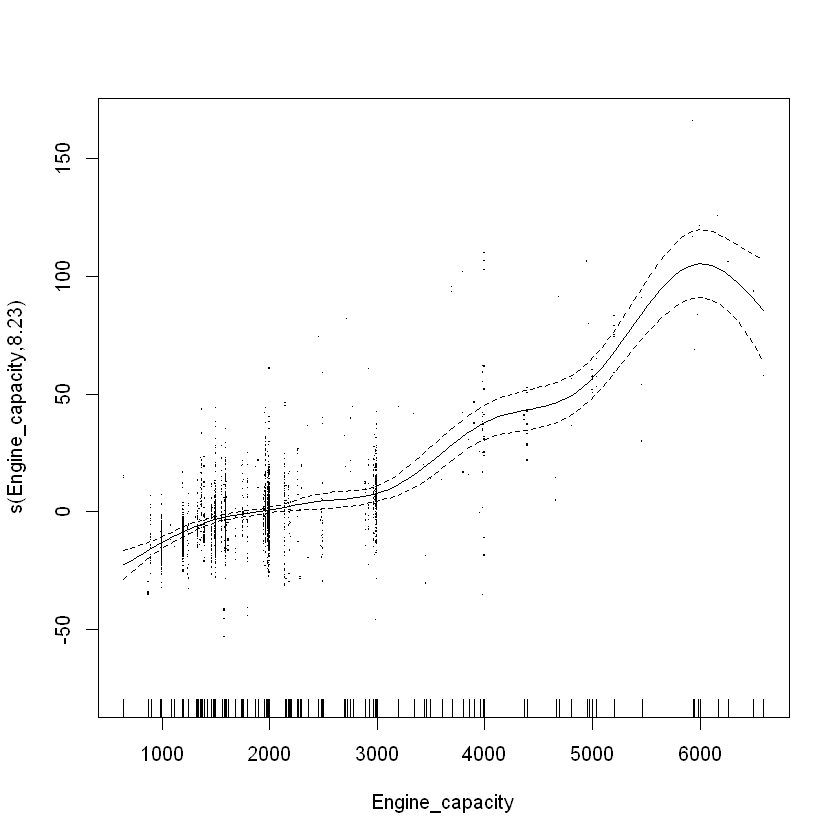

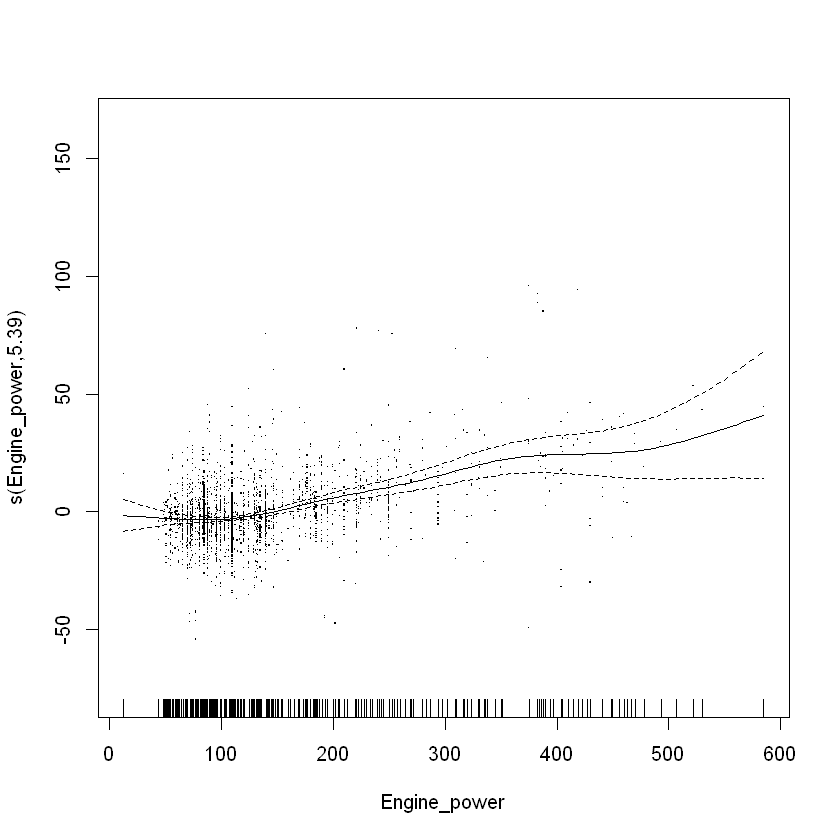

In [133]:
plot(gam_1, residuals = T)